<a href="https://colab.research.google.com/github/Ceciliawangwang/Tutorial_image_classification_SVM/blob/main/V3_Tutorial_SVM_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image classification
## 1. Introduction
In this tutorial, we will introduce image classification based on Support Vector Machine (SVM). The objectives of this tutorial are:


*   Learn the basics of SVM
*   Prepare data
*   Train image classifier




## 2 Support Vector Machine
Support Vector Machine is a supervised machine learnig algorithm mainly used in classification to find an optimal boundary of each class. In SVM algorithm, each data is a point in n-dimensional feature space. SVMs are effective in high dimensional spaces, so they are suitable for image classification tasks.

In this tutorial, we use the pixel values as features. However, in other cases, we could use shape, texture, ect.

## 2. Configure environment

**2.1 Get start with Google Colab**

*Google Colaboratory*  is a free, cloud-based development environment provided by Google. It allows users to write and run Python code in a web browser, with access to powerful computing resources such as GPUs and TPUs.

In this tutorial, we could access to a pre-configured Jupyter Notebooks running on Google colab: https://colab.research.google.com/

**2.2 Mount the Google Drive**







In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


**2.3 Import libraries**

To follow this guide, you need to have the following python libraries:
*   os
*   numpy
*   matplotlib
*   OpenCV
*   sklearn


In [ ]:
import os
import numpy as np
import cv2

# mport random
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import matplotlib.pyplot as plt

from google.colab.patches import cv2_imshow


## 3. Prepare image data
**3.1 Dataset**

First, let's prepare the images.
- Download data from https://github.com/Abhishek-Arora/Image-Classification-Using-SVM

- Upload images to Google Drive.

Note: *if you are interested in exploring other datasets, you can find them on: [Kaggle](https://www.kaggle.com/datasets), [Paperwithcode](https://paperswithcode.com/datasets), etc.*

**3.2 Folder structure**

Folders and images should be organized according to the following strucutre. Ensure that the folder names match the class/category labels.


```
root/
    dataset/
        label1/
            image1.jpg
            image2.jpg
            ...
        label2/
            image1.jpg
            image2.jpg
            ...
        label3/
            image1.jpg
            image2.jpg
            ...
```



Accordingly, set up the input directory `input_dir`and `categories`. Here we take pizza, sunflower and soccer_ball as an example.

In [ ]:
input_dir = '/content/drive/MyDrive/dataset' # change the input directory
categories = ['pizza','sunflower','soccer_ball']  # set up category labels

**3.3 Read images**

Then, preprocess images using `opencv` library. The objectives of preprocessing images are:


*   resize images into the same size before feeding into the classifier
*   convert the 3D array (R, G, B channel) into a 1D array



In [ ]:
data = []
labels = []
for category_idx, category in enumerate(categories): # enumerate
    for file in os.listdir(os.path.join(input_dir, category)):
        img_path = os.path.join(input_dir, category, file)
        img = cv2.imread(img_path)
        img = cv2.resize(img,(50,50))
        data.append(img.flatten())
        labels.append(category_idx)

data = np.asarray(data)
labels = np.asarray(labels)

## 4. Model training and prediction



**4.1 Split training and testing sets**

First, we should split data into training and testing sets.
`test_size=0.25` means 75% of images are used for training and the rest 25% of images are used for testing. The samples are randomly selected.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.25, random_state= 20)

**4.2 Train a classifer**

Now we can build a model using tranining data `classifier = SVC()` and start with default parameters.

In [ ]:
classifier = SVC()

The Model is trained well with the given images


Then we carry out Hyperparameter tunning to train a lot of classifiers to choose the best combination of parameters，including：

*   `C` : regularization parameter
*   `gamma`: RBF kernels
*   `kernel` parameters






In [ ]:
parameters = {'C':[0.1,1,10,100],'gamma':[0.0001,0.001,0.1,1],'kernel':['rbf','poly']}

grid = GridSearchCV(classifier, parameters) # Hyperparameter tuning

grid.fit(x_train, y_train)

print('The Model is trained well with the given images')

best_estimator = grid.best_estimator_

`best_estimator_ `returns an ***object*** of your model with the best set of parameters. Usually we use the model get `best_estimator_` to find best combination of hyperparameters then for predictions.

**4.3 Test performance and predict results**

Then we print the classification report and accuracy score.

In [ ]:
y_pred = best_estimator.predict(x_test)

score = metrics.accuracy_score(y_pred, y_test)

print('Classification report: \n', metrics.classification_report(y_test, y_pred))
print('{}% of samples were correctly classified'.format(str(score*100)))

77.77777777777779% of samples were correctly classified
Classification report: 
               precision    recall  f1-score   support

           0       1.00      0.75      0.86         8
           1       0.60      1.00      0.75         6
           2       1.00      0.50      0.67         4

    accuracy                           0.78        18
   macro avg       0.87      0.75      0.76        18
weighted avg       0.87      0.78      0.78        18

Accuracy score: 0.7777777777777778


Here, we will plot some of the test images with their predicted labels through the trained classifier.

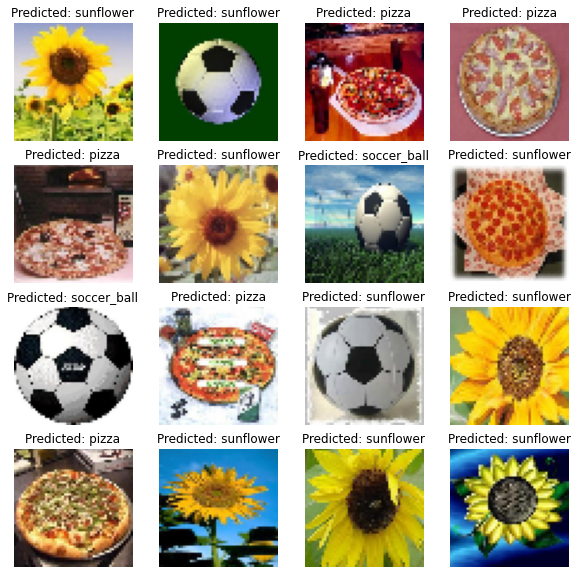

In [ ]:
# plot some of the test images with their predicted labels
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(10,10))
for i, ax in enumerate(axes.flat):
  image_array = x_test[i].reshape(50,50,3)
  image_array = image_array[:,:,::-1] # rotate image colors (BGR -> RGB)
  ax.imshow(image_array, cmap=plt.cm.gray_r)
  ax.set_title(f"Predicted: {categories[y_pred[i]]}")
  ax.axis('off')
plt.show()

## Reference


*   Image Classification Through Support Vector Machine (SVM) | Machine Learning

    https://www.youtube.com/watch?v=0rjlviOQlbc

*   Github: Image-Classification-Using-SVM

    https://github.com/Abhishek-Arora/Image-Classification-Using-SVM
